**Boosting** **Techniques**

**Question 1**: What is Boosting in Machine Learning? Explain how it improves weak
learners

--->
Boosting is an ensemble learning technique in machine learning that combines multiple weak learners to create a strong, highly accurate model.

Instead of training models independently, Boosting trains them sequentially, where each new model focuses on correcting the mistakes made by the previous ones.


How Boosting Improves Weak Learners:

Sequential Learning
Models are trained one after another. Each new learner depends on the performance of the previous learners.

Focus on Hard-to-Predict Data

Initially, all training examples are given equal importance.

After each iteration, misclassified data points receive higher weights.

The next model pays more attention to these difficult cases.

Weighted Combination of Models

Each weak learner is assigned a weight based on its accuracy.

More accurate models have more influence on the final prediction.

Error Reduction Over Time
By repeatedly focusing on errors, Boosting reduces bias and improves overall accuracy, converting weak learners into a strong ensemble.

**Question 2**: What is the difference between AdaBoost and Gradient Boosting in terms
of how models are trained

--->
1. How Models Are Trained in AdaBoost

Models are trained one after another.

Each data point is assigned a weight.

Initially, all points have equal weights.

After each model:

Misclassified samples get higher weights

Correctly classified samples get lower weights

The next model focuses more on previously misclassified data.

Final prediction is a weighted vote of all models.



2. How Models Are Trained in Gradient Boosting

Models are also trained sequentially, but:

Instead of reweighting data points, each new model:

Learns from the residual errors (difference between actual and predicted values)

Each model tries to minimize a loss function using gradient descent.

Predictions are added gradually using a learning rate.



**Question 3**: How does regularization help in XGBoost

--->
Why Regularization Is Needed:

Boosting models can become too complex by:

-Creating very deep trees

-Adding too many splits

-Overfitting noisy patterns in training data

-Regularization penalizes such complexity.

How XGBoost Uses Regularization:

XGBoost adds a regularization term directly to its objective (loss) function:

Objective = Training Loss + Regularization Term

This forces the model to balance accuracy vs simplicity.


  Key Regularization Techniques in XGBoost:
1. Tree Complexity Penalty

Penalizes the number of leaf nodes in a tree

Encourages simpler trees

Parameters:

gamma → Minimum loss reduction required to make a split

max_depth → Limits how deep trees can grow

Prevents unnecessary splits

2. L1 and L2 Regularization on Leaf Weights

L1 (Lasso – alpha)

Encourages sparse leaf weights

Can push some weights to zero

L2 (Ridge – lambda)

Shrinks large leaf weights

Prevents extreme predictions

3. Learning Rate (Shrinkage)

Controls how much each tree contributes

Smaller learning rate = slower, more stable learning

 Reduces overfitting by learning gradually

4. Subsampling (Stochastic Regularization)

Uses only a subset of rows and features per tree
Parameters:

subsample

colsample_bytree

 Adds randomness and reduces variance

**Question 4**: Why is CatBoost considered efficient for handling categorical data

-->
CatBoost is considered highly efficient for categorical data because it can use categorical features directly, without requiring extensive manual preprocessing like one-hot encoding or label encoding.

Reasons CatBoost Handles Categorical Data So Well:
1. Native Handling of Categorical Features

You can pass categorical columns as-is to CatBoost.

No need for:

One-hot encoding

Label encoding

This avoids:

High dimensionality

Loss of information

Especially powerful when categories have high cardinality (many unique values).

2. Ordered Target Encoding (Core Innovation)

CatBoost uses a special form of target encoding.

Each category is replaced by statistics (like mean target value).

Crucially, CatBoost computes these statistics using only past data during training.

Prevents target leakage, a common problem in standard target encoding.

3. Reduced Overfitting

By avoiding leakage and using ordered statistics:

The model does not “peek” at the target.

Overfitting is significantly reduced.

4. Symmetric (Oblivious) Decision Trees

CatBoost uses symmetric trees, where:

The same split is applied across each level.

Benefits:

Faster training

Better GPU/CPU optimization

More stable predictions

5. Minimal Data Preprocessing

Works well even when:

Categories are strings

Missing values exist

Saves time and reduces preprocessing errors.

**Question 5**: What are some real-world applications where boosting techniques are
preferred over bagging methods

-->1. Credit Risk & Loan Default Prediction

Why Boosting?

Financial data often has complex, non-linear relationships

Boosting reduces bias by focusing on hard-to-classify customers

Example Uses

Loan approval systems

Credit scoring models

Fraudulent applicant detection

 Boosting (like Gradient Boosting, XGBoost) is favored for its predictive power.

2. Fraud Detection (Banking & Insurance)

Why Boosting?

Fraud cases are rare and difficult to detect

Boosting focuses more on misclassified minority cases

Example Uses

Credit card fraud

Insurance claim fraud

 Bagging may miss rare patterns, while Boosting actively learns from mistakes.

3. Medical Diagnosis & Healthcare Prediction

Why Boosting?

Small errors can have serious consequences

Boosting improves performance on borderline or rare cases

Example Uses

Disease prediction

Cancer detection

Patient risk stratification

 Boosting provides better recall and precision.

4. Search Engines & Recommendation Systems

Why Boosting?

Needs to capture subtle user behavior patterns

Boosting optimizes ranking and relevance scores

Example Uses

Search result ranking

Product recommendations

Ad click-through rate prediction

 Boosting models excel at ranking problems.

5. Predictive Maintenance in Manufacturing

Why Boosting?

Equipment failures are rare but costly

Boosting identifies weak early signals of failure

Example Uses

Machine failure prediction

Quality defect detection

 Boosting improves early detection accuracy.

6. Competitions & Benchmark ML Problems

Why Boosting?

Delivers state-of-the-art accuracy

Handles mixed data types and missing values well

Example

Kaggle competitions

 Boosting is often the top-performing choice.

**Question 6**: Write a Python program to:
● Train an AdaBoost Classifier on the Breast Cancer dataset
● Print the model accuracy

In [6]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [7]:
data = load_breast_cancer()
X = data.data
y = data.target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [9]:
y_pred = adaboost_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Classifier Accuracy: {accuracy:.4f}")

AdaBoost Classifier Accuracy: 0.9708


**Question 7**: Write a Python program to:
● Train a Gradient Boosting Regressor on the California Housing dataset
● Evaluate performance using R-squared score

In [31]:
import pandas as pd
from sklearn.datasets import fetch_california_housing, fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import sys
import numpy as np

In [32]:
try:

    housing = fetch_california_housing(as_frame=True)
    X_housing = housing.data
    y_housing = housing.target
    print("Successfully loaded California Housing from sklearn.datasets.")
except Exception as e:
    print(f"Failed to load California Housing from sklearn.datasets directly: {e}", file=sys.stderr)
    print("Attempting to load from OpenML as a fallback...", file=sys.stderr)
    try:

        housing_openml = fetch_openml(name='california_housing', version=1, as_frame=True, return_X_y=False)
        X_housing = housing_openml.data
        y_housing = housing_openml.target
        print("Successfully loaded California Housing from OpenML.", file=sys.stderr)
    except Exception as e_openml:
        print(f"Failed to load California Housing from OpenML either: {e_openml}", file=sys.stderr)
        print("Please ensure you have an active internet connection. If the issue persists,", file=sys.stderr)
        print("you may need to manually download the California Housing dataset and load it.", file=sys.stderr)
        X_housing = pd.DataFrame()
        y_housing = pd.Series()


if not X_housing.empty and not y_housing.empty:

    for col in X_housing.columns:
        if X_housing[col].dtype == 'object':
            try:
                X_housing[col] = pd.to_numeric(X_housing[col], errors='coerce')
            except:
                pass

    categorical_cols = X_housing.select_dtypes(include=['object', 'category']).columns
    if not categorical_cols.empty:
        X_housing = pd.get_dummies(X_housing, columns=categorical_cols, drop_first=True)


    X_housing = X_housing.fillna(X_housing.mean(numeric_only=True))


    X_housing = X_housing.values.astype(np.float64)
    y_housing = y_housing.values.astype(np.float64)
else:

    X_housing = np.array([])
    y_housing = np.array([])


if X_housing.size == 0:
    print("Warning: X_housing is empty after preprocessing. Cannot train model.", file=sys.stderr)

/usr/local/lib/python3.12/dist-packages/sklearn/datasets/_base.py:1519: UserWarning: Retry downloading from url: https://ndownloader.figshare.com/files/5976036
  warnings.warn(f"Retry downloading from url: {remote.url}")
Failed to load California Housing from sklearn.datasets directly: HTTP Error 403: Forbidden
Attempting to load from OpenML as a fallback...
Successfully loaded California Housing from OpenML.


In [33]:

if X_housing.size > 0:
    X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(X_housing, y_housing, test_size=0.3, random_state=42)
    print("Data split into training and testing sets.")
else:
    X_train_housing, X_test_housing, y_train_housing, y_test_housing = np.array([]), np.array([]), np.array([]), np.array([])
    print("Skipping data split as X_housing is empty.")

Data split into training and testing sets.


In [34]:

if X_train_housing.size > 0:
    gbr_model = GradientBoostingRegressor(random_state=42)
    gbr_model.fit(X_train_housing, y_train_housing)
    print("Gradient Boosting Regressor trained successfully.")
else:
    gbr_model = None
    print("Skipping model training as training data is empty.")

Gradient Boosting Regressor trained successfully.


In [35]:

if gbr_model is not None and X_test_housing.size > 0:
    y_pred_housing = gbr_model.predict(X_test_housing)
    r2 = r2_score(y_test_housing, y_pred_housing)
    print(f"Gradient Boosting Regressor R-squared Score: {r2:.4f}")
else:
    print("Skipping prediction and R-squared calculation due to empty data or untrained model.")

Gradient Boosting Regressor R-squared Score: 0.7660


**Question 8**: Write a Python program to:
● Train an XGBoost Classifier on the Breast Cancer dataset
● Tune the learning rate using GridSearchCV
● Print the best parameters and accuracy

In [36]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score



In [37]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [38]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

In [39]:
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [04:24:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1, param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2]},
             scoring='accuracy', verbose=1)

In [40]:
print(f"Best parameters: {grid_search.best_params_}")

best_xgb_model = grid_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Classifier Accuracy with best parameters: {accuracy_xgb:.4f}")

Best parameters: {'learning_rate': 0.1}
XGBoost Classifier Accuracy with best parameters: 0.9591


**Question 9**: Write a Python program to:
● Train a CatBoost Classifier
● Plot the confusion matrix using seaborn

In [45]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.7 MB/s eta 0:00:00


In [46]:
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



In [47]:

cb_model = CatBoostClassifier(iterations=100,
                              learning_rate=0.1,
                              depth=6,
                              loss_function='Logloss',
                              eval_metric='Accuracy',
                              random_seed=42,
                              verbose=0)
cb_model.fit(X_train, y_train)

In [48]:
y_pred_cb = cb_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_cb)

print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[ 60   3]
 [  2 106]]


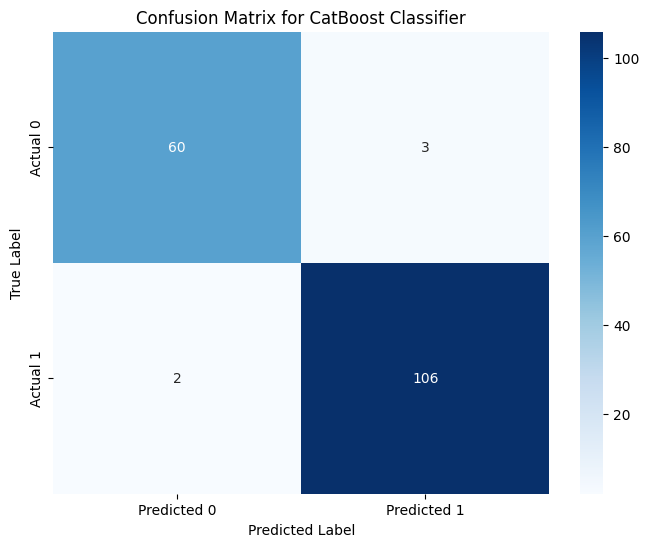

In [49]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for CatBoost Classifier')
plt.show()

**Question 10**: You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
● Data preprocessing & handling missing/categorical values
● Choice between AdaBoost, XGBoost, or CatBoost
● Hyperparameter tuning strategy
● Evaluation metrics you'd choose and why
● How the business would benefit from your model

**Reasoning**:
First, I need to import `classification_report` and `roc_auc_score` from `sklearn.metrics` to evaluate the model's performance.



In [54]:
from sklearn.metrics import classification_report, roc_auc_score


y_pred_proba_cb = cb_model.predict_proba(X_test)[:, 1]


print("\nClassification Report:\n", classification_report(y_test, y_pred_cb))


roc_auc = roc_auc_score(y_test, y_pred_proba_cb)
print(f"\nCatBoost Classifier ROC-AUC Score: {roc_auc:.4f}")


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        63
           1       0.97      0.98      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171


CatBoost Classifier ROC-AUC Score: 0.9968
